In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split

# from xgboost import XGBRRegressor

from sklearn import metrics
%matplotlib inline



In [202]:
df = pd.read_csv('housing.csv')

In [203]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [205]:
df.dropna(inplace=True)

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [207]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [209]:
train_data = X_train.join(y_train) 
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
12430,-116.26,33.65,3.0,7437.0,1222.0,574.0,302.0,10.2948,INLAND,382400.0
8987,-118.37,33.99,32.0,4018.0,564.0,1400.0,568.0,8.6718,<1H OCEAN,439100.0
13582,-117.29,34.12,40.0,2198.0,612.0,1517.0,531.0,1.0951,INLAND,65800.0
8944,-118.47,34.01,43.0,1160.0,304.0,393.0,250.0,2.9167,<1H OCEAN,461100.0
14658,-117.14,32.79,31.0,984.0,161.0,422.0,158.0,5.2820,NEAR OCEAN,183000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

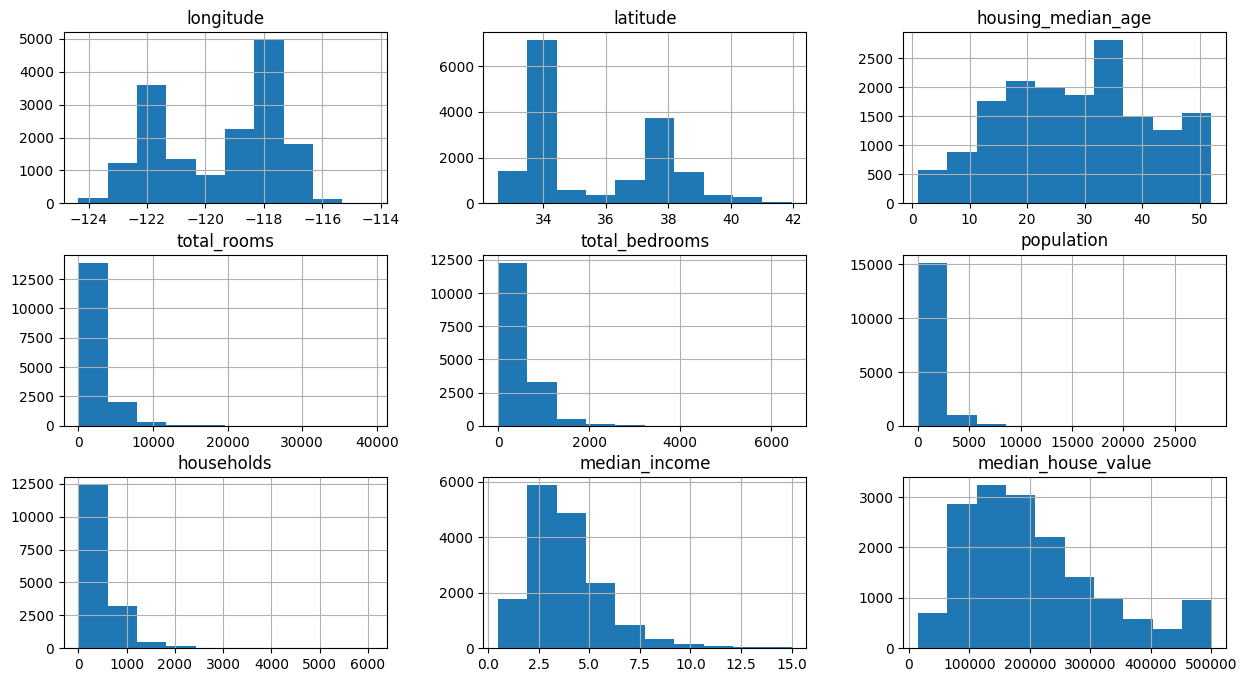

In [210]:
train_data.hist(figsize=(15,8))

C:\Users\islam\AppData\Local\Temp\ipykernel_41368\3934840271.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat =df.corr()


<Axes: >

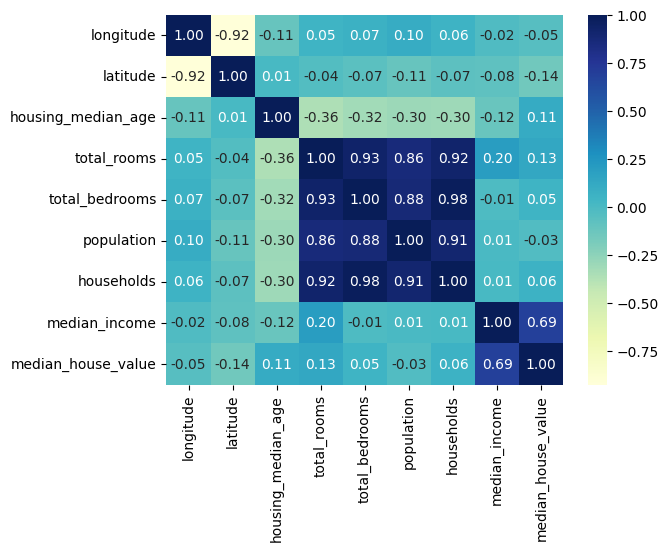

In [211]:
# correlations
corrmat =df.corr()
sns.heatmap(corrmat, fmt='.2f',annot=True, cmap='YlGnBu')

In [212]:
# transform into more normally distributed variables
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

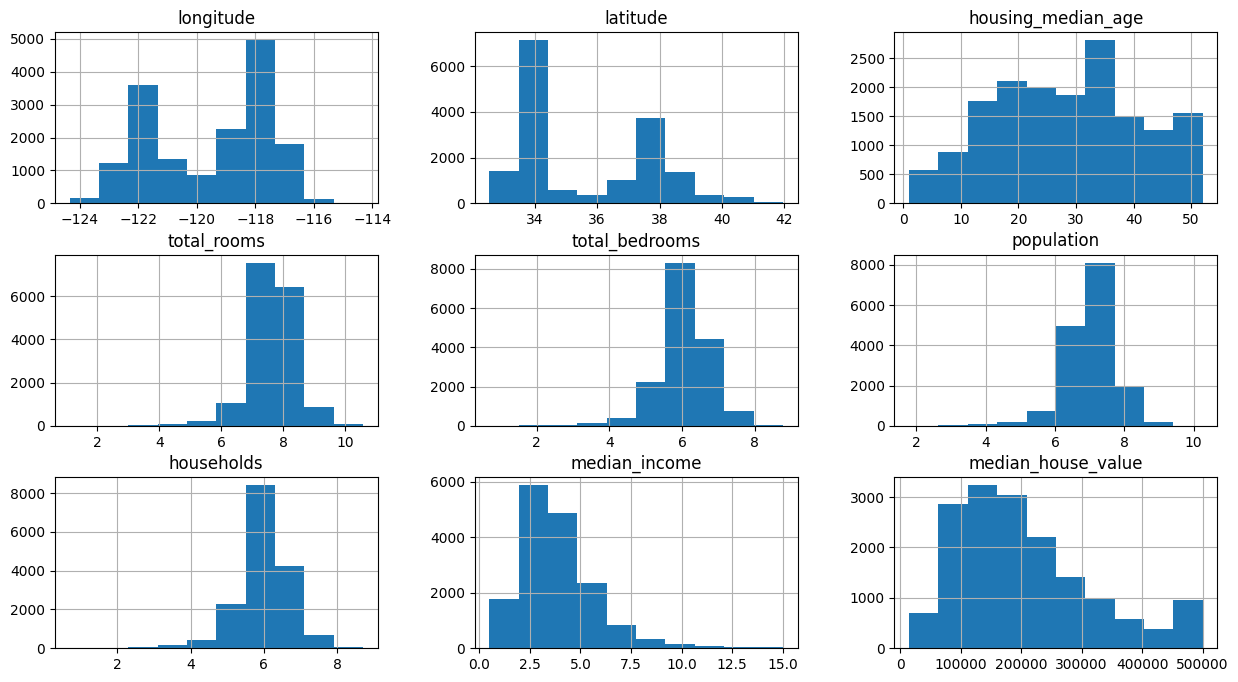

In [213]:
train_data.hist(figsize=(15,8))

In [214]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7230
INLAND        5225
NEAR OCEAN    2076
NEAR BAY      1811
ISLAND           4
Name: ocean_proximity, dtype: int64

In [215]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [216]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12430,-116.26,33.65,3.0,8.914357,7.109062,6.354370,5.713733,10.2948,382400.0,0,1,0,0,0
8987,-118.37,33.99,32.0,8.298788,6.336826,7.244942,6.343880,8.6718,439100.0,1,0,0,0,0
13582,-117.29,34.12,40.0,7.695758,6.418365,7.325149,6.276643,1.0951,65800.0,0,1,0,0,0
8944,-118.47,34.01,43.0,7.057037,5.720312,5.976351,5.525453,2.9167,461100.0,1,0,0,0,0
14658,-117.14,32.79,31.0,6.892642,5.087596,6.047372,5.068904,5.2820,183000.0,0,0,0,0,1


<Axes: >

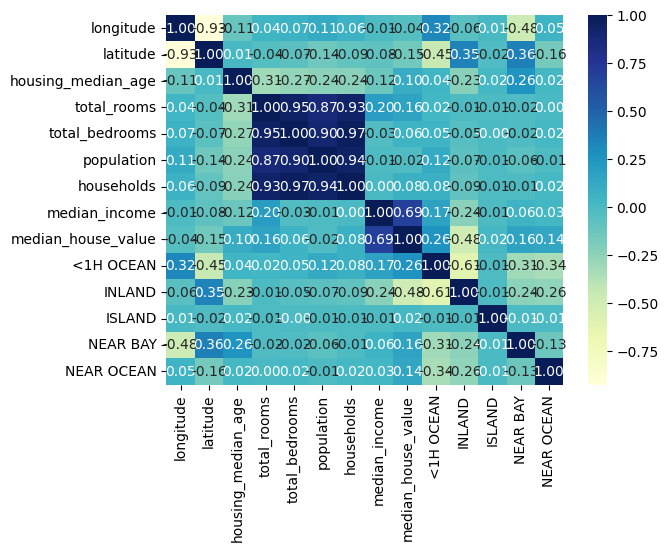

In [217]:
# correlations
corrmat =train_data.corr()
sns.heatmap(corrmat, fmt='.2f',annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

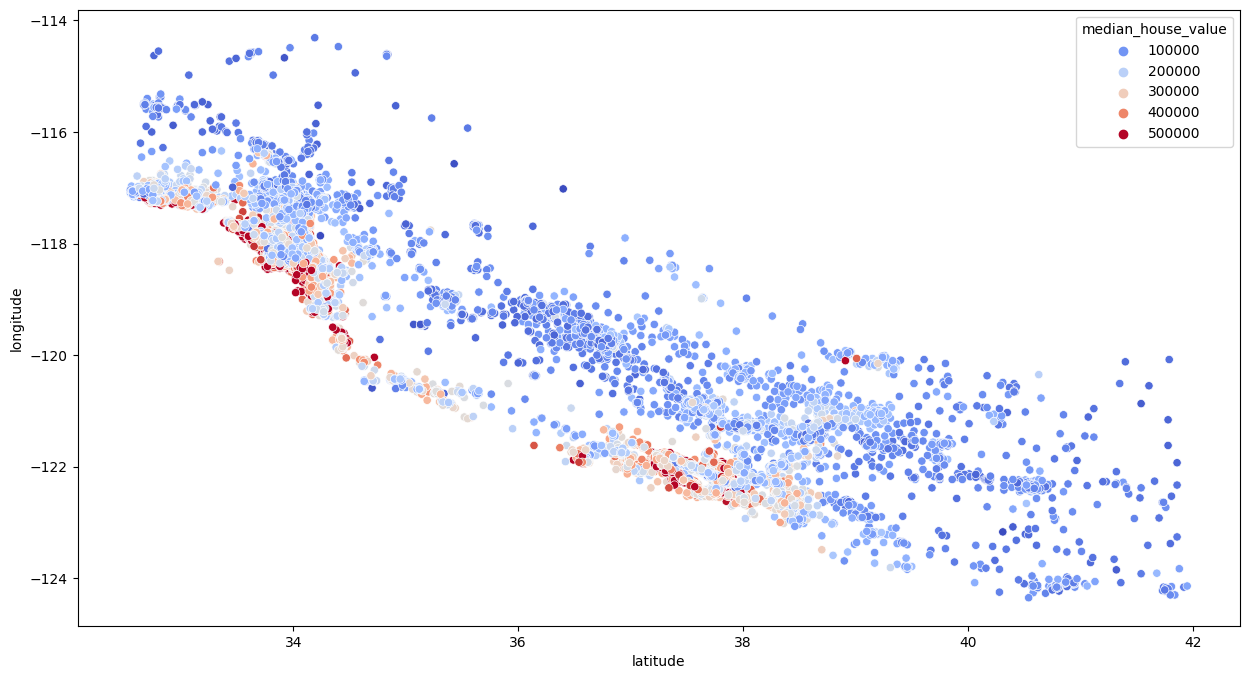

In [218]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [219]:
# closer to ocean are more expensive

In [220]:
train_data['bedroom_per_rooms'] =  train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_per_rooms'] =  train_data['total_rooms'] / train_data['households']

<Axes: >

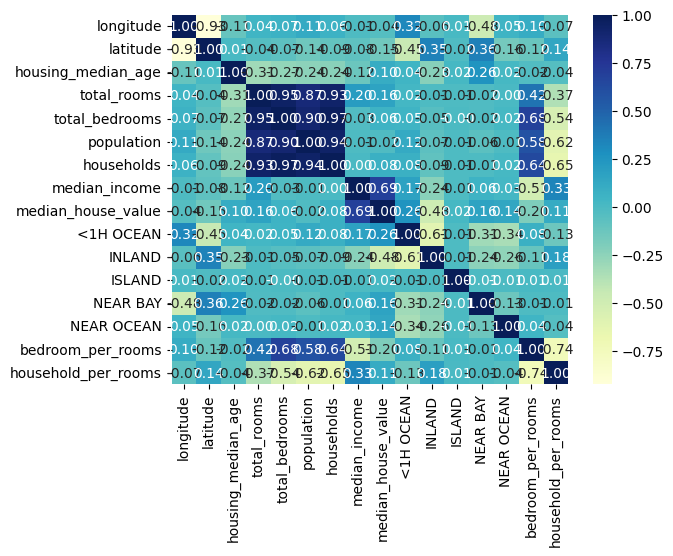

In [221]:
# correlations
corrmat =train_data.corr()
sns.heatmap(corrmat, fmt='.2f',annot=True, cmap='YlGnBu')

In [227]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = train_data.drop(['median_house_value'], axis=1)
y_train = train_data['median_house_value']

X_train_s = scaler.fit_transform(X_train)
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_s, y_train)

LinearRegression()

In [223]:
test_data = X_test.join(y_test) 

# transform into more normally distributed variables
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

# more informative features
test_data['bedroom_per_rooms'] =  test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_per_rooms'] =  test_data['total_rooms'] / test_data['households']

#split again
X_test = test_data.drop(['median_house_value'], axis=1)
y_test = test_data['median_house_value']



In [228]:
X_test_s = scaler.fit_transform(X_test)


In [224]:
test_data.shape
train_data.shape
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_per_rooms,household_per_rooms
12430,-116.26,33.65,3.0,8.914357,7.109062,6.354370,5.713733,10.2948,382400.0,0,1,0,0,0,0.797485,1.560163
8987,-118.37,33.99,32.0,8.298788,6.336826,7.244942,6.343880,8.6718,439100.0,1,0,0,0,0,0.763584,1.308156
13582,-117.29,34.12,40.0,7.695758,6.418365,7.325149,6.276643,1.0951,65800.0,0,1,0,0,0,0.834013,1.226094
8944,-118.47,34.01,43.0,7.057037,5.720312,5.976351,5.525453,2.9167,461100.0,1,0,0,0,0,0.810583,1.277187
14658,-117.14,32.79,31.0,6.892642,5.087596,6.047372,5.068904,5.2820,183000.0,0,0,0,0,1,0.738120,1.359789


In [225]:
test_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_per_rooms,household_per_rooms
2110,-119.75,36.75,49.0,7.754482,6.133398,7.163172,6.169611,2.5111,55400.0,0,1,0,0,0,0.790949,1.256883
16996,-122.26,37.54,5.0,7.408531,5.963579,6.659294,5.932245,6.9635,417300.0,0,0,0,1,0,0.804961,1.248858
16792,-122.45,37.66,35.0,7.915348,6.234411,7.343426,6.202536,5.3446,263300.0,0,0,0,0,1,0.787636,1.276147
6721,-118.14,34.13,16.0,8.180321,6.711740,7.317212,6.664409,4.9167,251100.0,1,0,0,0,0,0.820474,1.227464
18120,-122.00,37.32,34.0,8.146419,6.595781,7.557995,6.536692,4.7402,244500.0,1,0,0,0,0,0.809654,1.246260


In [229]:
linear_regression_model.score(X_test_s, y_test)

0.6553689551283725

In [237]:
# tring another model
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [238]:
forest.score(X_test_s, y_test)

0.7695506258957526